In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import collections        
# This is used to store the data commonly known as data structure such as lists, tuples, arrays, dictionaries, etc

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer
# It is used to transform a given text into a vector 
# -on the basis of the frequency (count) of each word that occurs in the entire text.-

from sklearn.metrics.pairwise import cosine_similarity
# Compute cosine similarity between samples in X and Y
#  Pairwise -- This method provides a safe way to take a distance matrix as input,
# --- while preserving compatibility with many other algorithms that take a vector array.---

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

In [4]:
df_movies = df[df['type']== 'Movie'].reset_index()  # We are doing this to filter movie data from dataset.
df_movies.title = df_movies.title.str.lower() # we are using lower and str because it is a preprocessing part of NLP.
df_movies['index'] = df_movies.index
df_movies.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s1,Movie,dick johnson is dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,1,s7,Movie,my little pony: a new generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
2,2,s8,Movie,sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
3,3,s10,Movie,the starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
4,4,s13,Movie,je suis karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...


In [5]:
df_shows = df[df['type']== 'TV Show'].reset_index()  # We are doing this to filter TV Shows data from dataset.
df_shows.title = df_shows.title.str.lower() # we are using lower and str because it is a preprocessing part of NLP.
df_shows['index'] = df_shows.index
df_shows.head()

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,0,s2,TV Show,blood & water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,1,s3,TV Show,ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,2,s4,TV Show,jailbirds new orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,3,s5,TV Show,kota factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,4,s6,TV Show,midnight mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...


In [6]:
# we are checking is there any duplicate items or not.

print(df_movies.duplicated().sum())
print(df_shows.duplicated().sum())     

0
0


# Exploratory data analysis

## Comparing number of TV  Shows and Movies

In [7]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

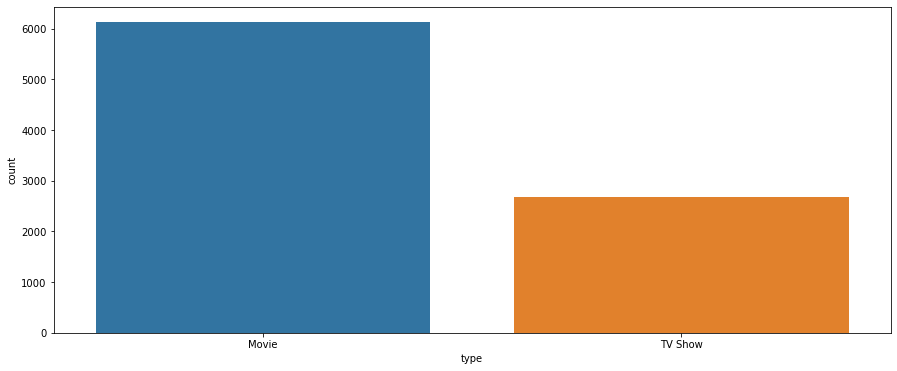

In [8]:
plt.figure(figsize=(15,6))
sns.countplot(data = df ,x ='type');

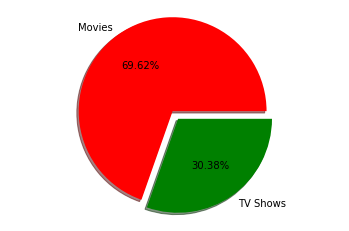

In [9]:
label = 'Movies','TV Shows'
color = ['r','green']
explode = (0.1,0)
sizes = df.type.value_counts()
plt.pie(sizes,explode = explode, colors= color, labels =label,shadow = True,autopct ='%1.2f%%')
plt.axis('equal');


In [10]:
# List of latest 15 movies

top_15 = df_movies.sort_values(by = 'release_year', ascending=False).head(15)
top_15[['title','release_year']]

,title,release_year
362,dynasty warriors,2021
484,myriam fares: the journey,2021
481,alan saldaña: locked up,2021
480,xtreme,2021
479,trippin' with the kandasamys,2021
478,sweet & sour,2021
475,breaking boundaries: the science of our planet,2021
473,kitty love: an homage to cats,2021
470,tragic jungle,2021
468,awake,2021


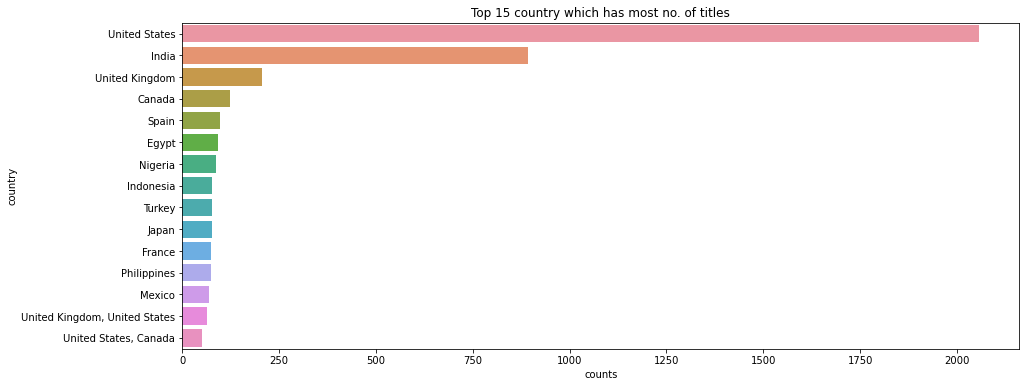

In [11]:
# Country with most numbers of title

plt.figure(figsize=(15,6))
top_countries = df_movies['country'].value_counts().rename_axis('country').reset_index(name = 'counts')[:15]
sns.barplot(data = top_countries, x= 'counts',y = 'country')
plt.title('Top 15 country which has most no. of titles');

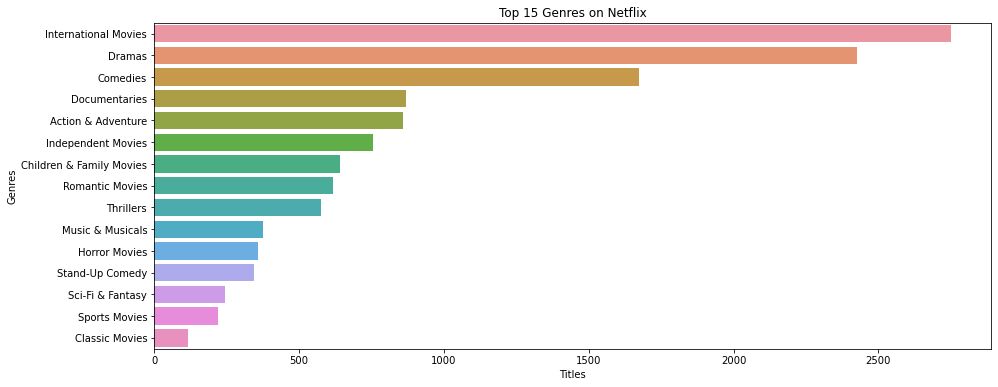

In [12]:
# Top 15 Genres 

filtered_genres = df_movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(15,6))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:15])
plt.title('Top 15 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

# Building Recommendation system

In [13]:
df_movies.columns

Index(['index', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

now, we will select a few features and create a column in a data frame that combines all the selected features into one string.

In [14]:
features = ['director','country','cast','listed_in','description']

So we have a function name as combined_features to which we give the input of rows and this returns the row of the features. By using the apply method we will transform this function to all the rows of the data frame:

In [15]:
# Create a column in a dataframe which combines all the selected features

for feature in features:
    df_movies[feature] = df_movies[feature].fillna('')
def combine_features(row):
    return row['director']+" "+row['country']+" "+row["cast"]+" "+row["listed_in"]+" "+row["description"]

In [16]:
df_movies['combined_features'] = df_movies.apply(combine_features,axis =1)
print('combine feature : ',df_movies['combined_features'])

combine feature :  0       Kirsten Johnson United States  Documentaries A...
1       Robert Cullen, José Luis Ucha  Vanessa Hudgens...
2       Haile Gerima United States, Ghana, Burkina Fas...
3       Theodore Melfi United States Melissa McCarthy,...
4       Christian Schwochow Germany, Czech Republic Lu...
                              ...                        
6126    Majid Al Ansari United Arab Emirates, Jordan A...
6127    David Fincher United States Mark Ruffalo, Jake...
6128    Ruben Fleischer United States Jesse Eisenberg,...
6129    Peter Hewitt United States Tim Allen, Courtene...
6130    Mozez Singh India Vicky Kaushal, Sarah-Jane Di...
Name: combined_features, Length: 6131, dtype: object


Now we need to check the similarities between the content for which we create the count metric and then get the cosine similarity to get the similarity score.

In [17]:
# Now we will create matrix from this new combine columns

cv = CountVectorizer()
count_matrix = cv.fit_transform(df_movies['combined_features'])
cosine_sim = cosine_similarity(count_matrix)

##  After getting the similarity between the content we just need to print the topmost similarity score --

In [18]:
# Get index of the movie from the title

def title_from_index(index):
    return df_movies[df_movies.index == index]['title'].values[0]

In [19]:
def title_from_index(df,index):
    return df[df.index == index]['title'].values[0]


In [20]:
def index_from_title(df,title):
    return df[df.title == title]['index'].values[0]

In [21]:
# Get the list of similar movies in the descending order of similarity score.

def selectmovie(movie_user_likes):
    try:
        movie_user_likes = movie_user_likes.lower()
        movie_index = index_from_title(df_movies,movie_user_likes)
        similar_movies  = list(enumerate(cosine_sim[movie_index]))
        sorted_similar_movies = sorted(similar_movies,key = lambda x:x[1],reverse=True)[1:]
        i = 0 
        print("Top  5 similar movies to " + movie_user_likes + " are:\n")
    
        for element in sorted_similar_movies:
            print(title_from_index(df_movies,element[0]))
            i = i+1
            if i>=5:
                break
    except:
        print("Movie not found in netflix")

In [22]:
# Print the title of top 5 similar movies

selectmovie('sweetheart')

Top  5 similar movies to sweetheart are:

apollo 18
dark light
automata
underworld
wildling
